In [1]:
from hdt_util.evaluation import ArmadilloV1_evaluator

import datetime

import matplotlib.pyplot as plt

In [2]:
evaluator = ArmadilloV1_evaluator(cache_loc='./request_cache', 
                                  start_date=datetime.date(2020, 3, 1), 
                                  end_date=datetime.date(2020, 10, 31), 
                                  max_prediction_length=5, 
                                  period=7, 
                                  min_train=10, 
                                  method='mean',
                                  delay=5)

In [3]:
model_args = {'args':{}}
prediction_result, evaluation_result = evaluator.evaluate_model(model_args, 
                                                                geo_type='state', 
                                                                metrics=[('mae', None)])

loading_data


  0%|          | 0/52 [00:00<?, ?it/s]

data loaded


100%|██████████| 52/52 [05:22<00:00,  6.19s/it]


In [4]:
prediction_result

,geo_value,prediction_length,real_value,predicted_value
0,ak,1,2.0,0.150807
1,ak,2,14.0,0.069093
2,ak,3,4.0,0.042728
3,ak,4,18.0,0.037948
4,ak,5,21.0,0.041046
...,...,...,...,...
255,wy,1,27.0,2.550368
256,wy,2,30.0,2.626959
257,wy,3,32.0,2.737962
258,wy,4,39.0,2.947988


In [5]:
#calculate MAE loss for different states and understand their distribution

geo_values = prediction_result['geo_value'].unique()
errors = []
for area in geo_values:
    y_true = prediction_result[prediction_result['geo_value']==area]['real_value'].values
    y_pred = prediction_result[prediction_result['geo_value']==area]['predicted_value'].values
    errors.append(evaluator.MAE(y_true, y_pred))

## MAE by state

(array([28., 10.,  4.,  5.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([  4.19819516,  81.78591698, 159.37363881, 236.96136064,
        314.54908247, 392.1368043 , 469.72452613, 547.31224795,
        624.89996978, 702.48769161, 780.07541344]),
 <BarContainer object of 10 artists>)

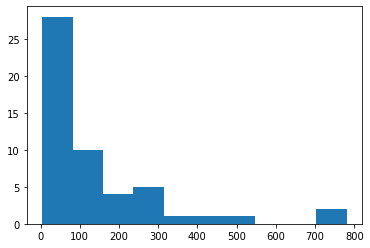

In [6]:
plt.hist(errors)

<AxesSubplot:>

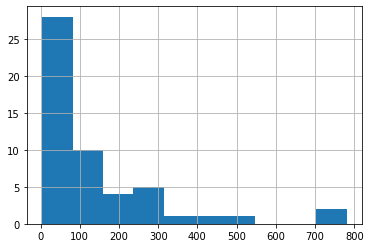

In [7]:
evaluation_result['MAE'].hist()

In [8]:
prediction_result['error'] = prediction_result.apply(lambda x : abs(x[2]-x[3]), axis=1)
prediction_result.head()

,geo_value,prediction_length,real_value,predicted_value,error
0,ak,1,2.0,0.150807,1.849193
1,ak,2,14.0,0.069093,13.930907
2,ak,3,4.0,0.042728,3.957272
3,ak,4,18.0,0.037948,17.962052
4,ak,5,21.0,0.041046,20.958954


## Boxplot of Absolute Error by prediction_length

<AxesSubplot:title={'center':'error'}, xlabel='prediction_length'>

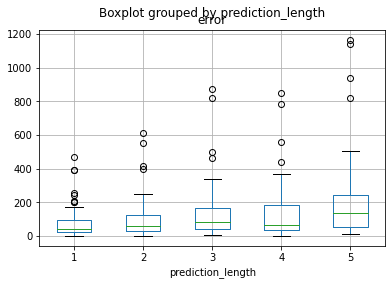

In [9]:
prediction_result.boxplot('error', by='prediction_length')